# Model Building and Evaluation: Steven Pilato

In [ ]:
#For importing data
import pandas as pd 
import numpy as np

#Feature
from sklearn.feature_extraction.text import TfidfTransformer

#Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix

#Other
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

#Data visualzation
import matplotlib.pyplot as plt

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
#Import redular Kaggle data frame for dependent variable assignment
#(Use sentiment_analysis_for_financial_news.csv)
path1 = ""
kaggle_df = pd.read_csv(path1, engine = "python")

# Model training and testing for Document Term-Matrix **With Stop-Words**

### Import Document term-frequency matrix form R

In [ ]:
#Import matrix with stop-words (document_frequency_matrix.csv)
path2 - ""
df = pd.read_csv(path2, engine = "python", index_col =0)
df.drop(columns = df.columns[0], inplace = True) #Remove unwanted columns
df.shape

(4846, 6839)

In [ ]:
df.head()


to  gran  the  compani  ...  newsroom  surpris  overshadow  broader
document                          ...                                        
text1      3     1    2        2  ...         0        0           0        0
text2      2     0    1        1  ...         0        0           0        0
text3      1     0    4        2  ...         0        0           0        0
text4      1     0    5        1  ...         0        0           0        0
text5      1     0    3        1  ...         0        0           0        0

[5 rows x 6839 columns]

### Split data into a training and test set

In [ ]:
# Assign predictors and dv to X and y
X = df.to_numpy()
X = TfidfTransformer().fit_transform(X).toarray() #Convert to tf-idf
y  = kaggle_df['Rating'].tolist()

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                   random_state = 7,
                                                   stratify = y) 

NB classifier

In [ ]:
########## No hyperparameter tuning ##########
# Train naive bayes classfier
nb_fit = MultinomialNB()
nb_fit.fit(X_train, y_train)

# Find accuracy 
y_pred = nb_fit.predict(X_test)
accuracy_score(y_test, y_pred)

0.6753782668500687

In [ ]:
########## With hyperparameter tuning ##########
max_alpha = 3
incriment = 0.002
alpha = list(np.linspace(1, max_alpha, int(max_alpha/incriment)))
param_grid = {'alpha': alpha}

#Start Random search
nb = MultinomialNB()
random_grid_search = RandomizedSearchCV(estimator = nb, 
                                        param_distributions = param_grid, 
                                        n_iter = 60, 
                                        scoring = 'accuracy',
                                        return_train_score = True,
                                        cv = 10, 
                                        n_jobs = 2,
                                        verbose = 3)
estimator = random_grid_search.fit(X_train, y_train)
print('Best parameters:', estimator.best_params_)
print('Best score:', estimator.best_score_)

#Save best nb estimator
nb_best = estimator.best_estimator_

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    6.2s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   22.7s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:   50.2s
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 600 out of 600 | elapsed:  1.7min finished


Best parameters: {'alpha': 1.0520346897931954}
Best score: 0.6656906125281971


In [ ]:
#Bagging NB
NB_bagging = BaggingClassifier(MultinomialNB(),
       n_estimators=200, random_state= 7).fit(X_train, y_train)

y_pred = NB_bagging.predict(X_test)
accuracy_score(y_test, y_pred)

0.6740027510316369

### Multinomial logistic regression

In [ ]:
########## No hyperparameter tuning ##########
LR_fit = LogisticRegression(multi_class= 'multinomial')
LR_fit.fit(X_train, y_train)

# Find accuracy 
y_pred = LR_fit.predict(X_test)
accuracy_score(y_test, y_pred)



0.7744154057771664

In [ ]:
#Bagging Logistic
logistic_bagging = BaggingClassifier(LogisticRegression(multi_class= 'multinomial'),
       n_estimators=200, random_state= 7).fit(X_train, y_train)

y_pred = logistic_bagging.predict(X_test)
accuracy_score(y_test, y_pred)

0.7675378266850069

### Linear Support vector machine

In [ ]:
########## No hyperparameter tuning ##########
SV_fit = LinearSVC()
SV_fit.fit(X_train, y_train)

# Find accuracy 
y_pred = SV_fit.predict(X_test)
accuracy_score(y_test, y_pred)

0.7744154057771664

In [ ]:
########## With hyperparameter tuning ##########

param_grid = {'penalty': ['l1', 'l2'],
              'loss': ['hinge', 'squared_hinge'],
              'max_iter': [1000, 1050, 2000],
              'tol': [0.0002, 0.0003, 0.0004, 0.0005, 0.0003, 0.0006]}

#Start Random search
SV = LinearSVC()
random_grid_search = RandomizedSearchCV(estimator = SV, 
                                        param_distributions = param_grid, 
                                        n_iter = 60, 
                                        scoring = 'accuracy',
                                        return_train_score = True,
                                        cv = 10, 
                                        n_jobs = 2,
                                        verbose = 3)

estimator = random_grid_search.fit(X_train, y_train)
print('Best parameters:', estimator.best_params_)
print('Best score:', estimator.best_score_)

#Save best nb estimator
sv_best = estimator.best_estimator_

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    6.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   22.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:   47.3s
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 600 out of 600 | elapsed:  1.5min finished


Best parameters: {'tol': 0.0003, 'penalty': 'l2', 'max_iter': 2000, 'loss': 'hinge'}
Best score: 0.7759430851986812


In [ ]:
#Bagging LinearSVM
linearSVM_bagging = BaggingClassifier(LinearSVC(
    tol= 0.0004, penalty= 'l2', max_iter = 3000, loss = 'hinge'
       ),
       n_estimators=100, random_state= 7).fit(X_train, y_train)

y_pred = linearSVM_bagging.predict(X_test)
accuracy_score(y_test, y_pred)

0.7819807427785419

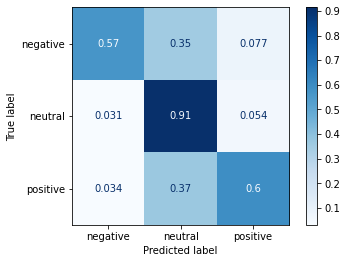

In [ ]:
   target_names = ['negative', 'neutral', 'positive']
plot_confusion_matrix(linearSVM_bagging, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                normalize = "true")

In [ ]:
dir(disp.figure_.figure)

['__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

### Voting classifer

In [ ]:
#create a dictionary of our models
estimators=[('l_SVM', sv_best), ('l_SVM_bagging', linearSVM_bagging), ('log_reg', LR_fit)
]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

#fit model
ensemble.fit(X_train, y_train)

#Score model
ensemble.score(X_test, y_test)

0.7792297111416782

# Model training and testing for Document Term-Matrix **Without** Stop-Words

### Import Document term-frequency matrix form R

In [ ]:
#Import matrix without stop-words (Use document_frequency_matrix_no_stop.csv)
path3 = ""
df = pd.read_csv(path3, engine = "python", index_col = "document")
df.drop(columns = df.columns[0], inplace = True) #Remove unwanted columns
df.shape

(4846, 6745)

In [ ]:
df.head()

accord  gran  compani  ha  ...  newsroom  surpris  overshadow  broader
document                             ...                                        
text1          1     1        2   1  ...         0        0           0        0
text2          0     0        1   0  ...         0        0           0        0
text3          0     0        2   1  ...         0        0           0        0
text4          0     0        1   0  ...         0        0           0        0
text5          1     0        1   0  ...         0        0           0        0

[5 rows x 6745 columns]

### Split data into a training and test set

In [ ]:
# Assign predictors and dv to X and y
X = df.to_numpy()
X = TfidfTransformer().fit_transform(X)#Convert to tf-idf
y  = kaggle_df['Rating'].tolist()

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                   random_state = 7,
                                                   stratify = y) 

NB classifier

In [ ]:
########## No hyperparameter tuning ##########
# Train naive bayes classfier
nb_fit = MultinomialNB()
nb_fit.fit(X_train, y_train)

# Find accuracy 
y_pred = nb_fit.predict(X_test)
accuracy_score(y_test, y_pred)

0.6705639614855571

In [ ]:
########## With hyperparameter tuning ##########
max_alpha = 3
incriment = 0.002
alpha = list(np.linspace(1, max_alpha, int(max_alpha/incriment)))
param_grid = {'alpha': alpha}

#Start Random search
nb = MultinomialNB()
random_grid_search = RandomizedSearchCV(estimator = nb, 
                                        param_distributions = param_grid, 
                                        n_iter = 60, 
                                        scoring = 'accuracy',
                                        return_train_score = True,
                                        cv = 10, 
                                        n_jobs = 2,
                                        verbose = 3)
estimator = random_grid_search.fit(X_train, y_train)
print('Best parameters:', estimator.best_params_)
print('Best score:', estimator.best_score_)

#Save best nb estimator
nb_best = estimator.best_estimator_

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  72 tasks      | elapsed:    1.7s


Best parameters: {'alpha': 1.0026684456304202}
Best score: 0.670105847648794


[Parallel(n_jobs=2)]: Done 600 out of 600 | elapsed:    5.7s finished


In [ ]:
#Bagging NB
NB_bagging = BaggingClassifier(MultinomialNB(),
       n_estimators=200, random_state= 7).fit(X_train, y_train)

y_pred = NB_bagging.predict(X_test)
accuracy_score(y_test, y_pred)

0.6691884456671252

### Multinomial logistic regression

In [ ]:
LR_fit = LogisticRegression(multi_class= 'multinomial')
LR_fit.fit(X_train, y_train)

# Find accuracy 
y_pred = LR_fit.predict(X_test)
accuracy_score(y_test, y_pred)



0.7462173314993122

In [ ]:
#Bagging Logistic
logistic_bagging = BaggingClassifier(LogisticRegression(multi_class= 'multinomial'),
       n_estimators=200, random_state= 7).fit(X_train, y_train)

y_pred = logistic_bagging.predict(X_test)
accuracy_score(y_test, y_pred)

0.7414030261348006

### Linear Support vector machine

In [ ]:
########## No hyperparameter tuning ##########
SV_fit = LinearSVC()
SV_fit.fit(X_train, y_train)

# Find accuracy 
y_pred = SV_fit.predict(X_test)
accuracy_score(y_test, y_pred)

0.7482806052269602

In [ ]:
########## With hyperparameter tuning ##########

param_grid = {'penalty': ['l1', 'l2'],
              'loss': ['hinge', 'squared_hinge'],
              'max_iter': [1000, 1050, 2000],
              'tol': [0.0004, 0.0005, 0.0003, 0.0006]}

#Start Random search
SV = LinearSVC()
random_grid_search = RandomizedSearchCV(estimator = SV, 
                                        param_distributions = param_grid, 
                                        n_iter = 60, 
                                        scoring = 'accuracy',
                                        return_train_score = True,
                                        cv = 10, 
                                        n_jobs = 2,
                                        verbose = 3)

estimator = random_grid_search.fit(X_train, y_train)
print('Best parameters:', estimator.best_params_)
print('Best score:', estimator.best_score_)

#Save best nb estimator
sv_best = estimator.best_estimator_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 48 is smaller than n_iter=60. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=2)]: Done 252 tasks      | elapsed:    6.8s


Best parameters: {'tol': 0.0004, 'penalty': 'l2', 'max_iter': 1000, 'loss': 'squared_hinge'}
Best score: 0.7497024119382265


[Parallel(n_jobs=2)]: Done 480 out of 480 | elapsed:   10.6s finished


In [ ]:
#Bagging LinearSVM
linearSVM_bagging = BaggingClassifier(LinearSVC(
    tol= 0.0004, penalty= 'l2', max_iter = 3000, loss = 'hinge'
       ),
       n_estimators=100, random_state= 7).fit(X_train, y_train)

y_pred = linearSVM_bagging.predict(X_test)
accuracy_score(y_test, y_pred)

0.750343878954608

### Voting classifer

In [ ]:
#create a dictionary of our models
estimators=[('l_SVM', sv_best), ('l_SVM_bagging', linearSVM_bagging), ('log_reg', LR_fit)
]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

#fit model
ensemble.fit(X_train, y_train)

#Score model
ensemble.score(X_test, y_test)

0.7537826685006878